<a href="https://colab.research.google.com/github/eriephil/eriephil.github.io/blob/main/finance_fidelity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt

plt.style.use('ggplot')


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/financial/CC-latestDL/Fidelity-4thQTR-2025.csv', \
                 usecols =['Run Date','Action','Amount ($)'],\
                 parse_dates=['Run Date'])

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.columns = ['Date','Description','Amount']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 0 to 101
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         102 non-null    object 
 1   Description  102 non-null    object 
 2   Amount       102 non-null    float64
dtypes: float64(1), object(2)
memory usage: 3.2+ KB


In [ ]:
df2 = df.groupby(['Description','Date']).sum().round(2).sort_values('Description').head(7500)#.agg({'Amount':['count','sum']}).head(20).round(2)

In [ ]:
pip install odfpy openpyxl



---



In [ ]:
df.Date = pd.to_datetime(df.Date).dt.date

In [ ]:
df2 = df.groupby('Description').agg({'Amount':['count', 'sum']}).round(2).sort_values(by=[('Amount','sum')], key=abs, ascending=False)

In [ ]:
df2

Amount          
                                                    count       sum
Description                                                        
DIRECT DEPOSIT SSA TREAS 3XXSOC SEC (Cash)              6  12190.20
DIVIDEND RECEIVED FIDELITY INTERNATL INDEX FUND...      1  10117.43
REINVESTMENT FIDELITY INTERNATL INDEX FUND (FSP...      1 -10117.43
DIVIDEND RECEIVED FIDELITY 500 INDEX FUND (FXAI...      2   7737.67
REINVESTMENT FIDELITY 500 INDEX FUND (FXAIX) (M...      2  -7737.67
...                                                   ...       ...
DEBIT CARD PURCHASE TST* LEYE - DO-RITE DO CHIC...      1     -6.13
DEBIT CARD PURCHASE VENTRA MOBILE 877-669-8368 ...      1     -5.00
DEBIT CARD PURCHASE TT* NORTA MOBILE NOV22 TOKE...      1     -3.00
DEBIT CARD PURCHASE CTLP*JACKS VENDING SER LAPL...      1     -2.60
DEBIT CARD PURCHASE TT* NORTA MOBILE NOV21 TOKE...      1     -1.25

[74 rows x 2 columns]

/tmp/ipython-input-2549585327.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=('Amount', 'sum'), y='Description', data=plot_data, palette='viridis')


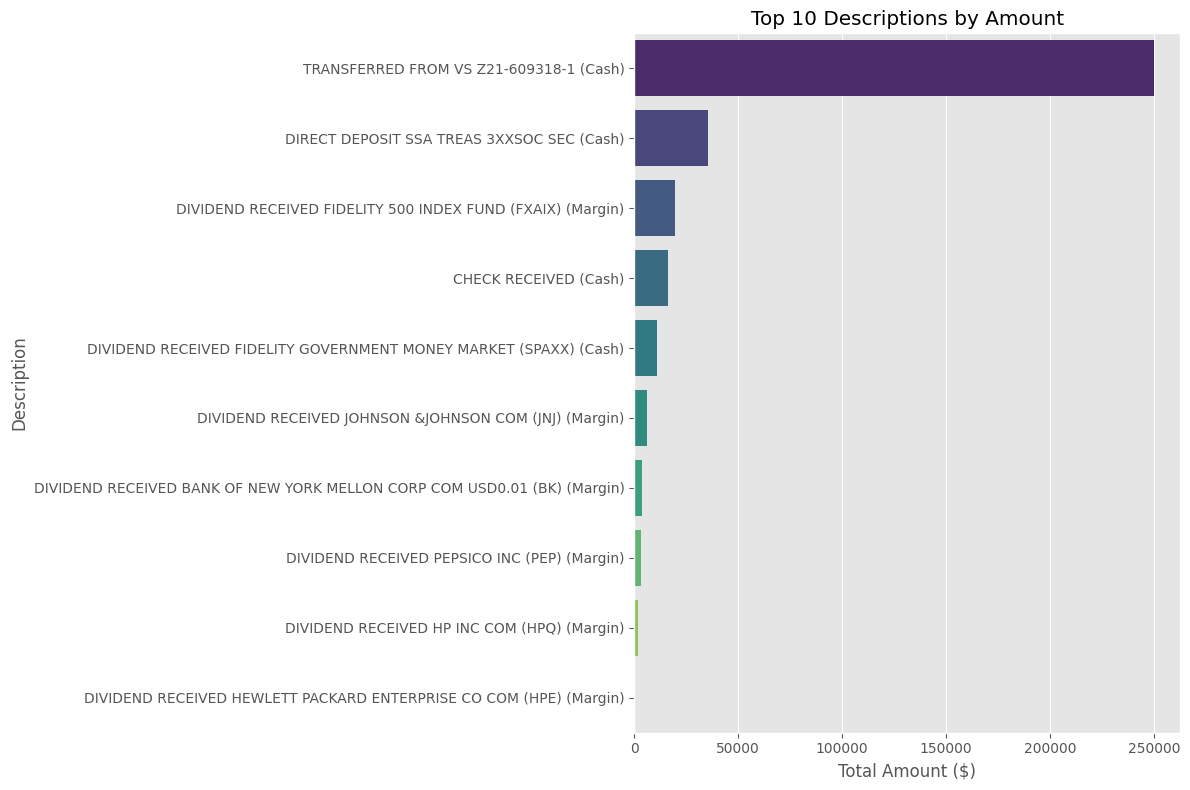

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 descriptions by the absolute sum of Amount from df2
top_10_descriptions = df2.nlargest(10, ('Amount', 'sum'))

# Prepare data for plotting
plot_data = top_10_descriptions.reset_index()

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=('Amount', 'sum'), y='Description', data=plot_data, palette='viridis')
plt.title('Top 10 Descriptions by Amount')
plt.xlabel('Total Amount ($)')
plt.ylabel('Description')
plt.tight_layout()
plt.show()